In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img=mpimg.imread("Pictures/Camera Roll/WIN_20200811_11_35_19_Pro.jpg")

In [3]:
type(img)

numpy.ndarray

In [4]:
img.size

2764800

In [5]:
img.shape

(720, 1280, 3)

In [6]:
img[0].shape

(1280, 3)

In [7]:
img[0]

array([[ 38,  72,  99],
       [ 40,  74, 102],
       [ 44,  78, 106],
       ...,
       [135, 123, 127],
       [132, 119, 128],
       [125, 112, 121]], dtype=uint8)

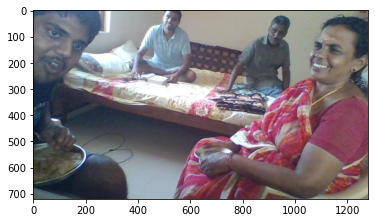

In [8]:
#the real image
plt.imshow(img)

<h2>Matrix tranformations:</h2>

In [9]:
#grayscale transformation
gray=np.array([[1/3,1/3,1/3],[1/3,1/3,1/3],[1/3,1/3,1/3]])
gray @ img[719,1279]

array([116.33333333, 116.33333333, 116.33333333])

In [10]:
new=img.copy()

In [11]:
new.setflags(write=1)

In [12]:
for i in range(img.shape[0]):
    for j in range(img[i].shape[0]):
        new[i,j]=gray @ img[i,j]

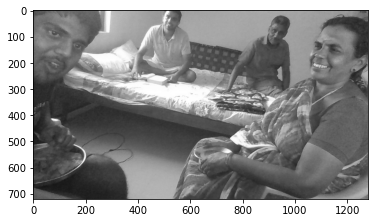

In [13]:
plt.imshow(new)

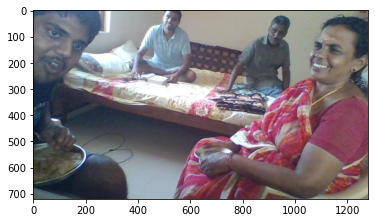

In [14]:
plt.imshow(img)

In [15]:
#sepia effect
sepia=np.array([[0.393,0.769,0.189],[0.349,0.686,0.168],[0.272,0.534,0.131]])

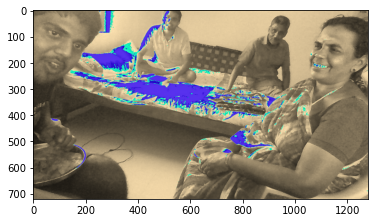

In [16]:
new=img.copy()
new.setflags(write=1)
for i in range(img.shape[0]):
    for j in range(img[i].shape[0]):
        new[i,j]=sepia @ img[i,j]
plt.imshow(new)

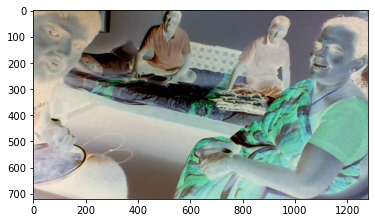

In [17]:
#negaative of an image
neg=np.array([[-1,0,0],[0,-1,0],[0,0,-1]])
V=np.array([255,255,255])
new=img.copy()
new.setflags(write=1)
for i in range(img.shape[0]):
    for j in range(img[i].shape[0]):
        new[i,j]=neg @ img[i,j] - V
plt.imshow(new)

Enter the adjustment parameter[-100 to 100]0


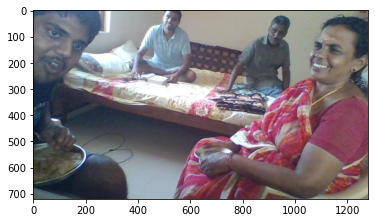

In [18]:
#contrast adjustment
f=int(input("Enter the adjustment parameter[-100 to 100]"))
f=(259*(f+255))/(255*(259-f))
arr=np.array([[f,0,0],[0,f,0],[0,0,f]])
V1=np.array([-128,-128,-128])
V2=np.array([128,128,128])
new=img.copy()
new.setflags(write=1)
for i in range(img.shape[0]):
    for j in range(img[i].shape[0]):
        new[i,j]=V1+ arr @ img[i,j] - V2
plt.imshow(new)

In [26]:
new=img.copy()
new.setflags(write=1)
def goal(arr):
    t = np.linspace(-10, 10, arr.shape[0]*arr.shape[1])
    bump = np.exp(-0.1*t**2)
    bump/=np.trapz(bump)
    bump=bump.reshape(arr.shape[0],arr.shape[1])
    arr1=bump*arr[0:,0:,0]
    arr2=bump*arr[0:,0:,1]
    arr3=bump*arr[0:,0:,2]
#     print(np.array([np.sum(arr1),np.sum(arr2),np.sum(arr3)]))
    return np.array([np.sum(arr1),np.sum(arr2),np.sum(arr3)])
def blur_func(n):
    for i in range(img.shape[0]):
        for j in range(img[i].shape[0]):
            if(i-n//2>=0 and j-n//2>=0 and j+n//2<img[i].shape[0] and i+n//2<img.shape[0]):
                new[i,j]=goal(img[i-n//2:i+n//2+1,j-n//2:j+n//2+1])
            elif(i-n//2>=0 and j-n//2>=0):
                new[i,j]=goal(img[i-n//2:i+1,j-n//2:j+1])
            elif(j+n//2<img[i].shape[0] and i+n//2<img.shape[0]):
                new[i,j]=goal(img[i:i+n//2+1,j:j+n//2+1])
blur_func(100)

In [27]:
new

array([[[ 99, 106, 121],
        [ 99, 106, 121],
        [100, 107, 122],
        ...,
        [135, 123, 127],
        [132, 119, 128],
        [125, 112, 121]],

       [[101, 107, 121],
        [101, 107, 122],
        [102, 108, 122],
        ...,
        [132, 119, 126],
        [133, 120, 129],
        [131, 118, 128]],

       [[102, 108, 121],
        [103, 108, 122],
        [103, 109, 122],
        ...,
        [130, 117, 124],
        [129, 116, 126],
        [130, 114, 125]],

       ...,

       [[ 88, 100,  86],
        [ 89, 101,  89],
        [ 87,  99,  87],
        ...,
        [172, 170, 146],
        [173, 170, 146],
        [173, 171, 147]],

       [[ 97, 108,  94],
        [ 96, 108,  94],
        [ 93, 105,  93],
        ...,
        [173, 171, 147],
        [174, 171, 147],
        [174, 172, 148]],

       [[ 99, 110,  96],
        [100, 111,  97],
        [ 95, 107,  93],
        ...,
        [174, 172, 148],
        [175, 172, 148],
        [175, 173, 149]]

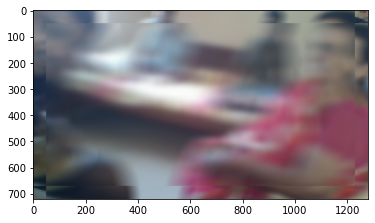

In [28]:
plt.imshow(new)

[-10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5  10. ]
[4.53999298e-05 3.60656314e-03 8.20849986e-02 5.35261429e-01
 1.00000000e+00 5.35261429e-01 8.20849986e-02 3.60656314e-03
 4.53999298e-05]


array([[2.02501848e-05, 1.60867143e-03, 3.66131930e-02],
       [2.38748009e-01, 4.46040003e-01, 2.38748009e-01],
       [3.66131930e-02, 1.60867143e-03, 2.02501848e-05]])

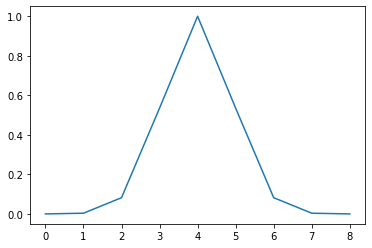

In [32]:
t = np.linspace(-10, 10, 9)
print(t)
bump = np.exp(-0.1*t**2)
print(bump)
plt.plot(bump)
bump/=np.trapz(bump)
bump.reshape(3,3)